In [3]:
!pip install h5py==2.10 -i https://pypi.tuna.tsinghua.edu.cn/simple/
#https://github.com/keras-team/keras/issues/14265

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


In [4]:
# -*- coding: utf-8 -*-
import json
import cv2
from yolo.backend.utils.box import draw_scaled_boxes
import os
import yolo

C:\Users\alvin\anaconda3\envs\yolo\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\alvin\anaconda3\envs\yolo\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\alvin\anaconda3\envs\yolo\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\alvin\anaconda3\envs\yolo\lib\site-packages\tensorflow\python\frame

In [5]:
#https://github.com/penny4860/Yolo-digit-detector/issues/48
#https://github.com/keras-team/keras/issues/14265#issuecomment-720376773
#!pip install h5py==2.10.0
#conda install h5py==2.10.0

In [6]:
img_size = 416

In [7]:
from yolo.frontend import create_yolo

img_size = 416   #256 didnt work

# 1. create yolo instance
#yolo_detector = create_yolo("ResNet50", ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], 416)
yolo_detector = create_yolo("ResNet50", ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], img_size) 








__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 416, 416, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 208, 208, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 208, 208, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 208, 208, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max

In [8]:
yolo.PROJECT_ROOT

'c:\\users\\alvin\\downloads\\yolo-digit-detector'

In [9]:
# 2. load pretrained weighted file
# Pretrained weight file is at https://drive.google.com/drive/folders/1Lg3eAPC39G9GwVTCH3XzF73Eok-N-dER

DEFAULT_WEIGHT_FILE = os.path.join(yolo.PROJECT_ROOT, "weights.h5")
yolo_detector.load_weights(DEFAULT_WEIGHT_FILE)

Loading pre-trained weights in c:\users\alvin\downloads\yolo-digit-detector\weights.h5


In [10]:
# 3. Load images

import os
import matplotlib.pyplot as plt
%matplotlib inline  
#DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "imgs")

#img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "1.png"), os.path.join(DEFAULT_IMAGE_FOLDER, "2.png")]

dir = "runs/detect/exp5/crops/price_tag"
img_files = [os.path.join(dir,x) for x in os.listdir(dir) if (not x.endswith("_SR.jpg")) and (x.startswith("AEONBIGBATUPAHATPS_20220706T103517396"))]

temp = []
for fname in img_files:
    temp.append(fname)
    temp.append(fname.split(".jpg")[0] + "_SR.jpg")
img_files = temp

imgs = []
for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    """
    #https://pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    thresh = cv2.adaptiveThreshold(blur,255,1,1,11,2)
    img = thresh
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) 
    """
    
    """
    #padding
    top_bot_half = (img_size - img.shape[0]) // 2 if img_size > img.shape[0] else 0
    lef_rig_half = (img_size - img.shape[1]) // 2 if img_size > img.shape[1] else 0
    img = cv2.copyMakeBorder(img,
                             top_bot_half,top_bot_half,
                             lef_rig_half,lef_rig_half,cv2.BORDER_CONSTANT,value=0)#BLUE)
    #Image is displayed with matplotlib. So RED and BLUE channels will be interchanged compared to cv2
    """
    
    imgs.append(img)
    #plt.imshow(img)
    #plt.show()

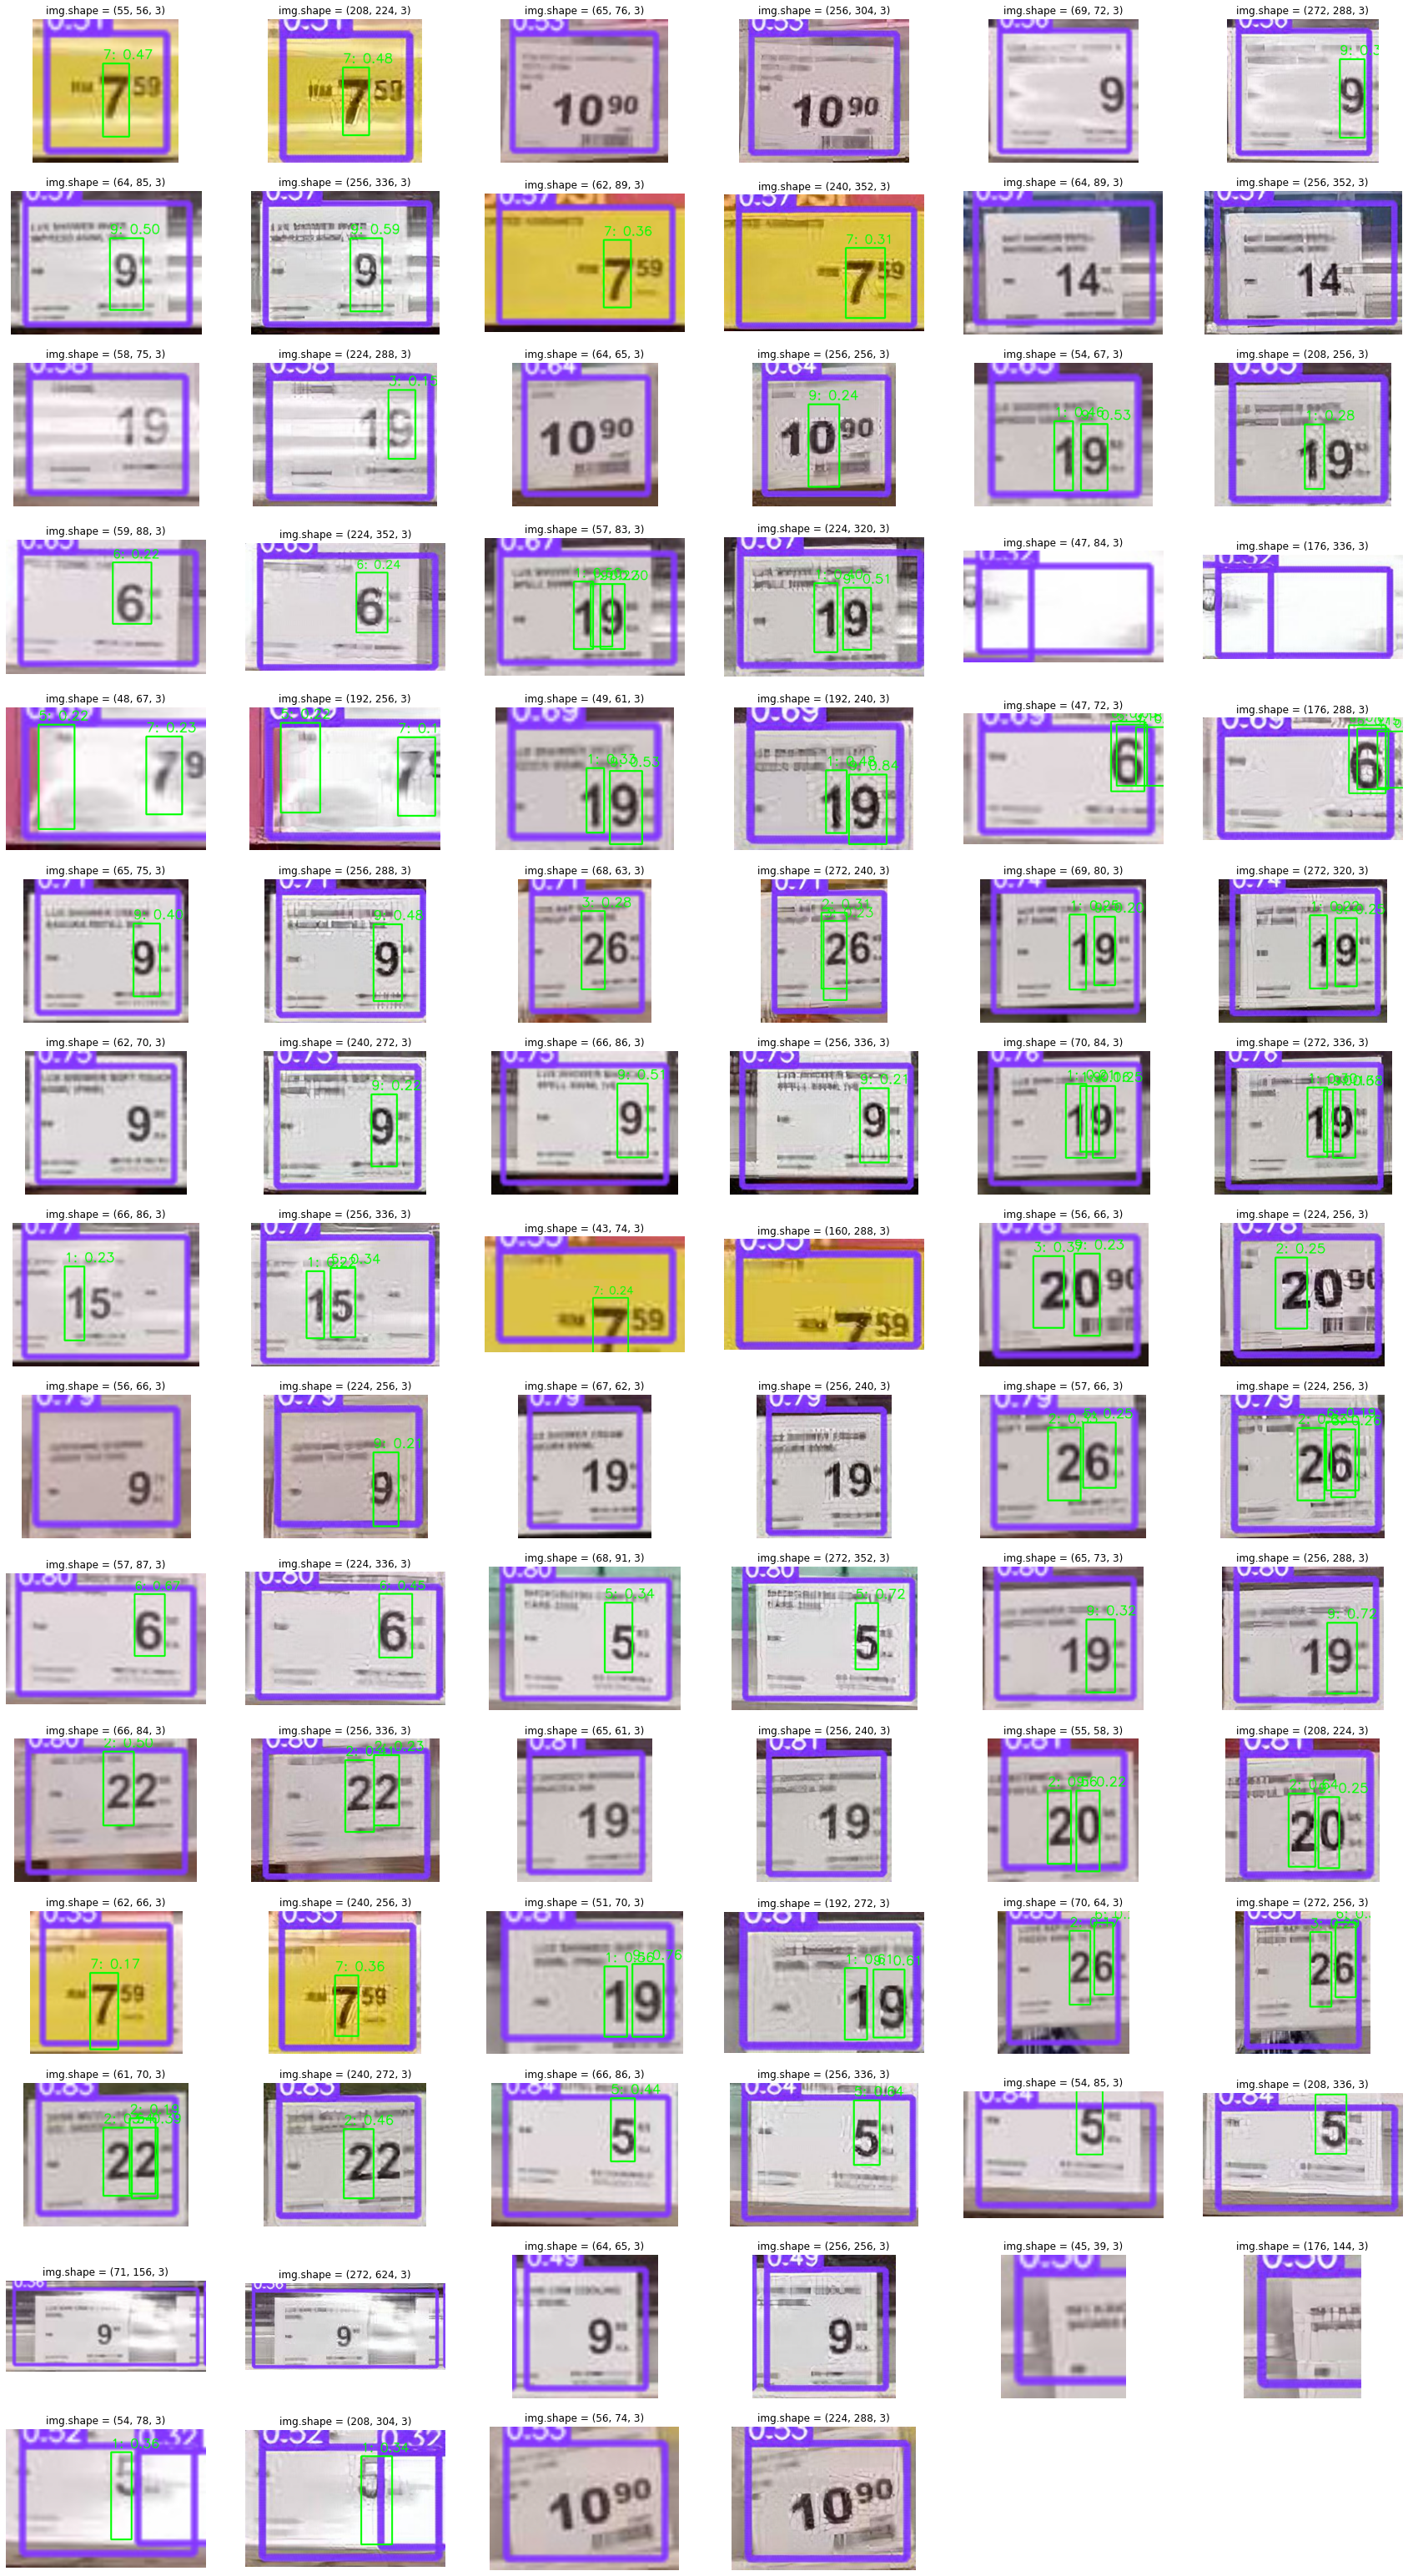

In [14]:
# 4. Predict digit region

THRESHOLD = 0.15 #lower threshold, more boxes
num_rows = len(imgs)//6 + 1
plt.figure(figsize=(30, (15/4)*num_rows))
for i, img in enumerate(imgs):
    ax = plt.subplot(num_rows, 6, i + 1)
    ax.axis('off')
    
    boxes, probs = yolo_detector.predict(img, THRESHOLD)

    # 4. save detection result
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

    #print("{}-boxes are detected.".format(len(boxes)))
    txt = "img.shape = " + str(img.shape)
    plt.title(txt, color='black')
    plt.imshow(image)
plt.show()


In [ ]:
#https://github.com/penny4860/Yolo-digit-detector